In [1]:
#Mengimpor Modul yang diperlukan
import pandas as pd
import re
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from statsmodels.graphics.mosaicplot import mosaic
from wordcloud import WordCloud

In [2]:
#Cek data ada database
connection_data = sql.connect('abusive_text.db', check_same_thread= False)
cursor = connection_data.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables =cursor.fetchall()
print('Daftar Table')
for i in tables:
  print(i[0])

Daftar Table
ABUSIVE
ALAY


In [3]:
#Membangun fungsi untuk Cleansing data

def preprocessing_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = text.replace('user', '')
    words = [word for word in text.split() if len(word) > 2]
    return ' '.join(words)

def normalize_text(text):
    data_alay = pd.read_sql_query('select * from ALAY', connection_data)
    dict_alay = dict(zip(data_alay['teks_alay'], data_alay['teks_baku'])) #Membungkus data teks_alay dan teks baku menjadi dictionary
    text_list = text.split()
    
    text_normal_list = [dict_alay.get(word, word) for word in text_list] #Mengambil nilai baku pada data teks_baku
    
    text_normal = ' '.join(text_normal_list) #mengganti teks yang tidak baku menjadi baku
    return text_normal.strip()

def delete_stopword(text):
    factory_remove = StopWordRemoverFactory()
    stf_data = factory_remove.get_stop_words()
    text = text.split()
    approval_teks = ''
    for str_index in text:
        if (bool(str_index not in stf_data)):
            approval_teks = approval_teks + ' ' + str_index

    return approval_teks

def cleansing (text):
    text = preprocessing_text(text)
    text = normalize_text (text)
    text = delete_stopword(text)
    
    return text



In [4]:
#Mengambil main data
df = pd.read_csv('Dataset/data.csv', encoding='latin-1')
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Memeriksa missing value
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [6]:
#Memerika Duolicates Data
df.duplicated().sum()


125

In [7]:
#Menghapus Duplicates data
df.drop_duplicates(inplace=True)

In [8]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
#Mengimplementasi fungsi cleansing pada new data tweet
df['Cleansing_Tweet'] = df.Tweet.apply(cleansing)

In [10]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Cleansing_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue ka...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi tau kamu edan sarap gue b...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir aku tetap percaya tuhan p...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit dilihat mana aku
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal ta...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor sekate an...
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh xaa
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu ...


In [11]:
df['Total_Karakter']=df['Tweet'].apply(len)
df


,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Cleansing_Tweet,Total_Karakter
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue ka...,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi tau kamu edan sarap gue b...,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir aku tetap percaya tuhan p...,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit dilihat mana aku,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal ta...,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor sekate an...,61
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk,28
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh xaa,62
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu ...,135


In [12]:
df['Total_Kata']=df['Tweet'].apply(lambda x:len(x.split()))
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,Cleansing_Tweet,Total_Karakter,Total_Kata
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,semua cowok berusaha melacak perhatian gue ka...,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,siapa telat memberi tau kamu edan sarap gue b...,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang aku berpikir aku tetap percaya tuhan p...,254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,aku aku ku tau matamu sipit dilihat mana aku,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir kelihatan dongoknya awal ta...,89,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,jangan asal berbicara ndasmu congor sekate an...,61,10
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,kasur mana enak kunyuk,28,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,hati hati bisu bosan duh xaa,62,9
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,bom real mudah terdeteksi bom terkubur suatu ...,135,22


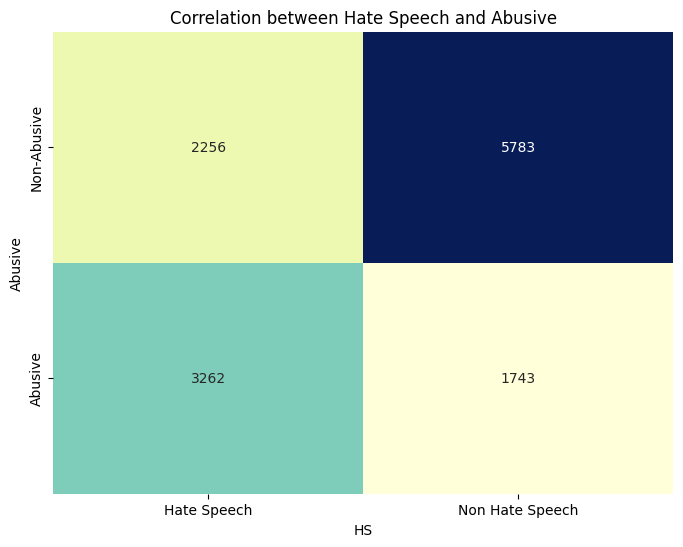

In [13]:
#Visualisasi Mosaic
#Memperlihatkan korelasi antara HS dan Abusive
HS_Abusive = df[(df['HS']==1) & (df['Abusive']==1)].shape[0]
HS_Non_Abusive = df[(df['HS']==1) & (df['Abusive']==0)].shape[0]
NonHS_Abusive= df[(df['HS']==0) & (df['Abusive']==1)].shape[0]
NonHS_NonAbusive = df[(df['HS']==0) & (df['Abusive']==0)].shape[0]

data = [[HS_Non_Abusive, NonHS_NonAbusive], [HS_Abusive, NonHS_Abusive]]

labels_x = ['Hate Speech', 'Non Hate Speech']
labels_y = ['Non-Abusive', 'Abusive']
hm_df = pd.DataFrame(data, columns=labels_x, index=labels_y)

plt.figure(figsize=(8, 6))
sns.heatmap(hm_df, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.xlabel('HS')
plt.ylabel('Abusive')
plt.title('Correlation between Hate Speech and Abusive')
plt.xticks([0.5, 1.5], labels_x)
plt.yticks([0.5, 1.5], labels_y)
plt.show()

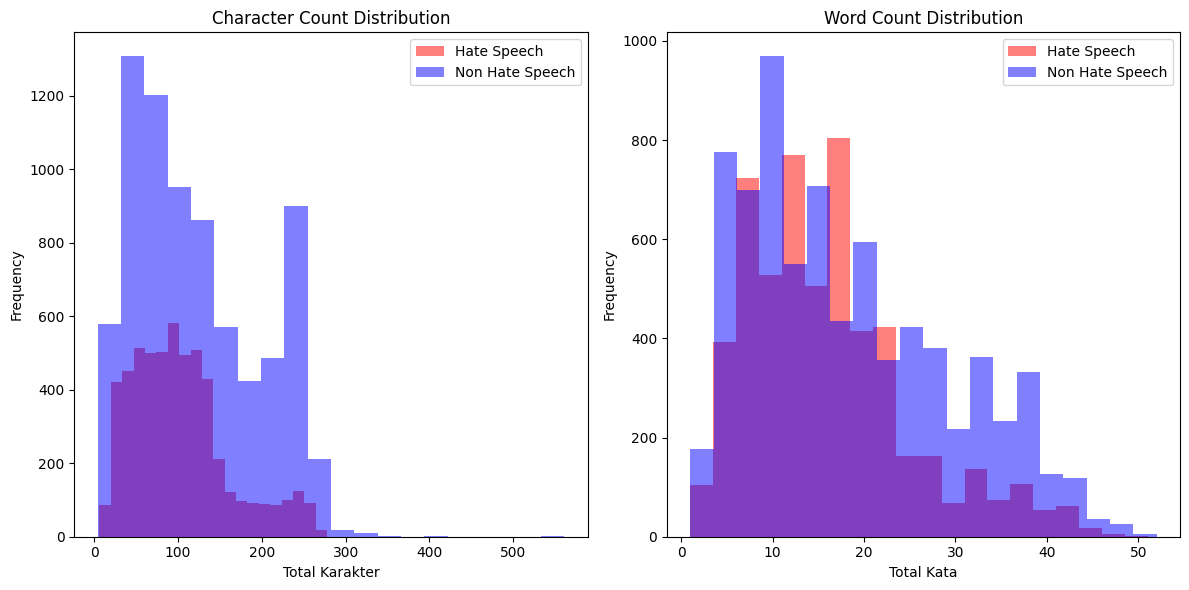

In [14]:

# Generate histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df[df['HS'] == 1]['Total_Karakter'], bins=20, alpha=0.5, color='red', label='Hate Speech')
plt.hist(df[df['HS'] == 0]['Total_Karakter'], bins=20, alpha=0.5, color='blue', label='Non Hate Speech')
plt.title('Character Count Distribution')
plt.xlabel('Total Karakter')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df[df['HS'] == 1]['Total_Kata'], bins=20, alpha=0.5, color='red', label='Hate Speech')
plt.hist(df[df['HS'] == 0]['Total_Kata'], bins=20, alpha=0.5, color='blue', label='Non Hate Speech')
plt.title('Word Count Distribution')
plt.xlabel('Total Kata')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

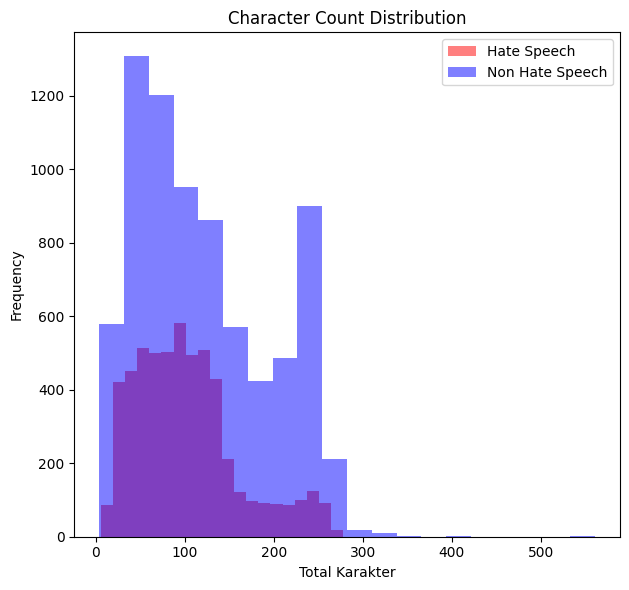

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df[df['HS'] == 1]['Total_Karakter'], bins=20, alpha=0.5, color='red', label='Hate Speech')
plt.hist(df[df['HS'] == 0]['Total_Karakter'], bins=20, alpha=0.5, color='blue', label='Non Hate Speech')
plt.title('Character Count Distribution')
plt.xlabel('Total Karakter')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

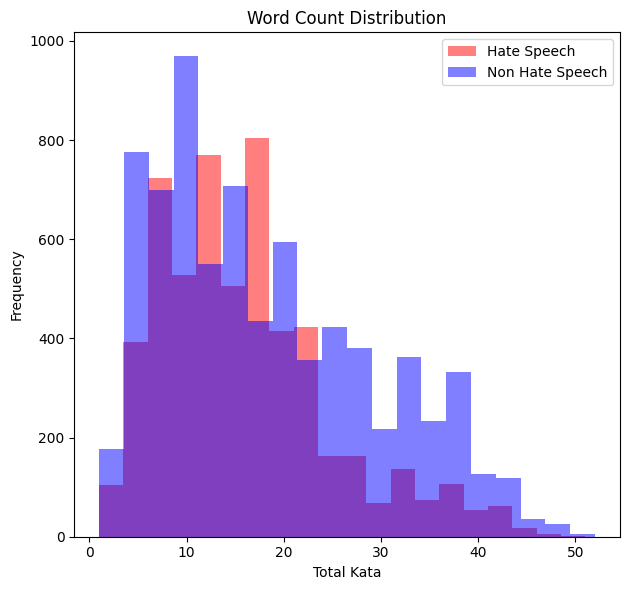

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.hist(df[df['HS'] == 1]['Total_Kata'], bins=20, alpha=0.5, color='red', label='Hate Speech')
plt.hist(df[df['HS'] == 0]['Total_Kata'], bins=20, alpha=0.5, color='blue', label='Non Hate Speech')
plt.title('Word Count Distribution')
plt.xlabel('Total Kata')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Data Visualization and Exploratory Data Analysis

In [17]:
#Visualisasi abusive data
Abusive_counts = df['Abusive'].value_counts()
print ('Abusive Comparation')
print (Abusive_counts)

Abusive Comparation
Abusive
0    8039
1    5005
Name: count, dtype: int64


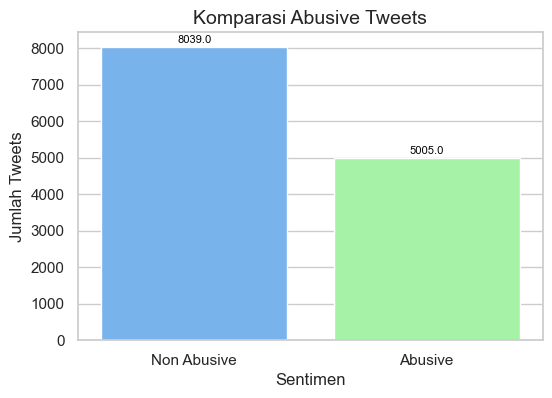

In [18]:
Abusive_counts.index = ['Non Abusive', 'Abusive']

sns.set(style='whitegrid')

plt.figure(figsize= (6,4))
ax = sns.barplot(x=Abusive_counts.index, y=Abusive_counts.values, palette=['#66b3ff', '#99ff99'])

for value in ax.patches:
    ax.annotate(str(value.get_height()), (value.get_x() + value.get_width() / 2., value.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.title('Komparasi Abusive Tweets' , fontsize=14)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweets')

plt.show()

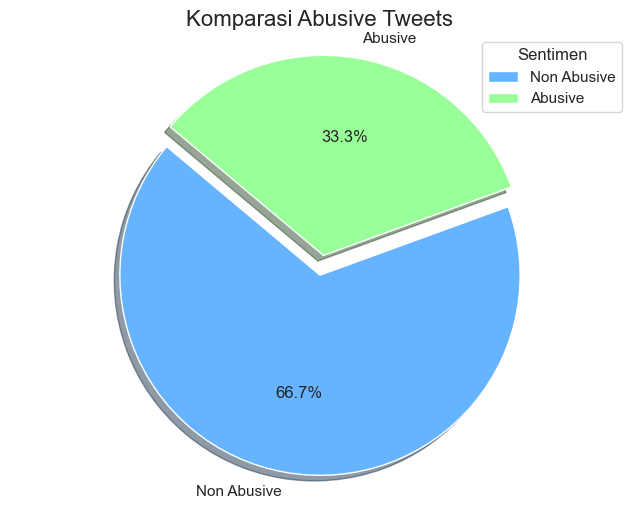

In [19]:
#Perbandingan data melalui visualisasi pie chart
labels = ['Non Abusive', 'Abusive']
sizes = [100, 50]
colors = ['#66b3ff', '#99ff99']
explode = (0.1, 0)  # Explode untuk memisahkan visualisasi data

# Pembuatan pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

# Title dan legend
plt.title('Komparasi Abusive Tweets', fontsize=16)
plt.legend(title='Sentimen', loc='best')


plt.show()

In [20]:
# Analisis perbandingan total Hate Speech dan Non Hate Speech
sentiment_counts = df['HS'].value_counts()
print("Analisis Sentimen:")
print(sentiment_counts)

Analisis Sentimen:
HS
0    7526
1    5518
Name: count, dtype: int64


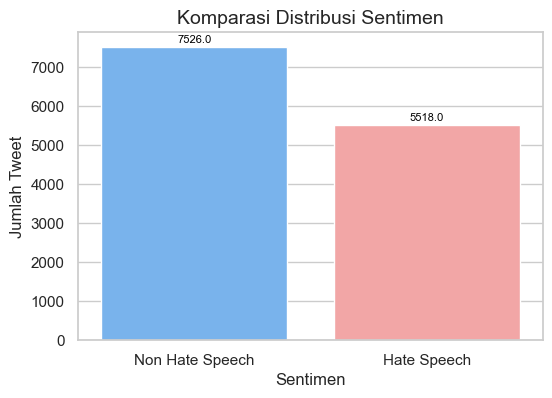

In [21]:
# Mengganti label pada sumbu x
sentiment_counts.index = ['Non Hate Speech', 'Hate Speech']  # Ganti dengan label yang sesuai

# Atur gaya tema Seaborn
sns.set(style="whitegrid")

# Buat visualisasi bar dengan Seaborn
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#66b3ff', '#ff9999'])

# Tambahkan nilai di atas batang
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Menambahkan judul dan label sumbu
plt.title('Komparasi Distribusi Sentimen', fontsize=14)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

# Tampilkan visualisasi
plt.show()

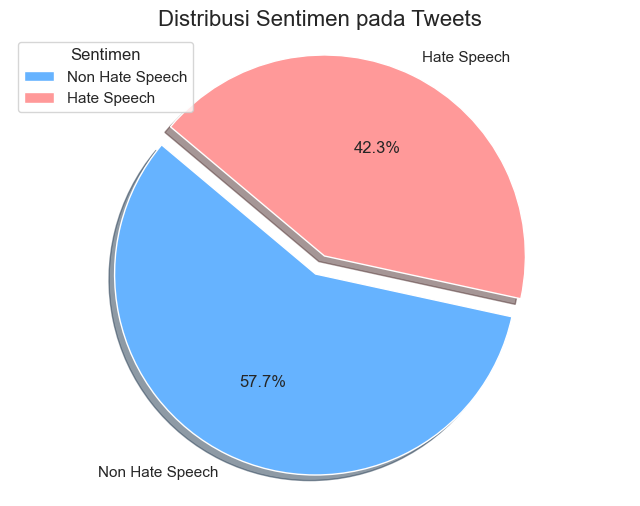

In [22]:
# Data
labels = ['Non Hate Speech', 'Hate Speech']
sizes = sentiment_counts.values
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Explode 1st slice


plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)


plt.axis('equal')


plt.title('Distribusi Sentimen pada Tweets', fontsize=16)


plt.legend(title='Sentimen', labels=labels, loc='best')

plt.show()

In [23]:
# Total perbandingan masing-masing kata hate speech & Kata-kata kasar (abusive text)
df_total_sum = pd.DataFrame({'HS_Individual': df[df['HS_Individual'] ==1]['HS_Individual'].sum(),
                   'HS_Group': df[df['HS_Group']==1]['HS_Group'].sum(),
                   'HS_Religion': df[df['HS_Religion']==1]['HS_Religion'].sum(),
                   'HS_Race': df[df['HS_Race']==1]['HS_Race'].sum(),
                   'HS_Physical': df[df['HS_Physical']==1]['HS_Physical'].sum(),
                   'HS_Gender': df[df['HS_Gender']==1]['HS_Gender'].sum(),
                   'HS_Other': df[df['HS_Other']==1]['HS_Other'].sum(),
                    }, index=[1])
df_total_sum



,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other
1,3540,1978,789,563,322,304,3706


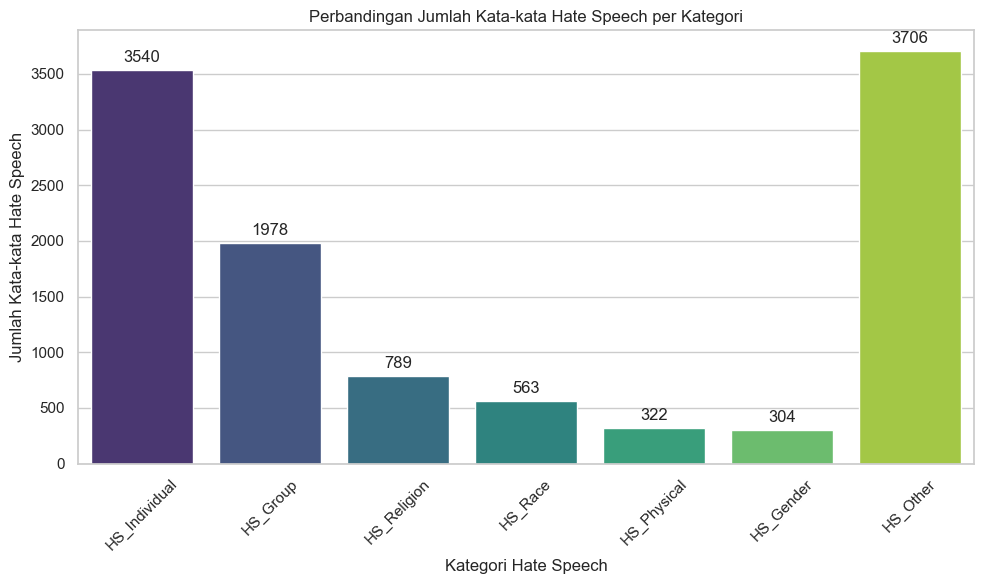

In [24]:
# Mengatur Style Seaborn
sns.set(style="whitegrid")

#Membuat bar plot dari data df_total_sum
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_total_sum.columns, y=df_total_sum.values[0], palette="viridis")

# Label dan Judul
plt.xlabel('Kategori Hate Speech')
plt.ylabel('Jumlah Kata-kata Hate Speech')
plt.title('Perbandingan Jumlah Kata-kata Hate Speech per Kategori')

# Menyesuaikan baris x agar lebih terlihat visualis
plt.xticks(rotation=45)

# Menambahkan label nilai di masing-masing atas bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

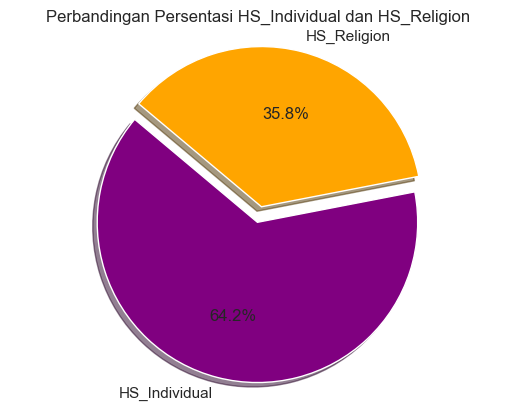

In [25]:
total_individual = df['HS_Individual'].sum()
total_religion = df['HS_Group'].sum()

# Membuat data untuk pie chart
labels = ['HS_Individual', 'HS_Religion']
sizes = [total_individual, total_religion]
colors = ['purple', 'orange']
explode = (0.1, 0)  # Jika ingin meledakkan sektor pertama

# Membuat pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Membuat aspek rasio menjadi sama untuk menghasilkan lingkaran
plt.title('Perbandingan Persentasi HS_Individual dan HS_Religion')
plt.show()

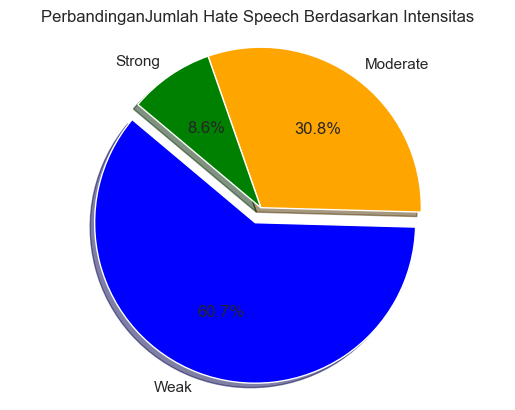

In [26]:
total_weak = df['HS_Weak'].sum()
total_Moderate = df['HS_Moderate'].sum()
total_Strong = df['HS_Strong'].sum()

labels = ['Weak', 'Moderate', 'Strong']
sizes = [total_weak, total_Moderate, total_Strong]
colors = ['blue', 'orange', 'green']
explode = (0.1, 0, 0)  # Jika ingin meledakkan sektor pertama

# Membuat pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Membuat aspek rasio menjadi sama untuk menghasilkan lingkaran
plt.title('PerbandinganJumlah Hate Speech Berdasarkan Intensitas')
plt.show()

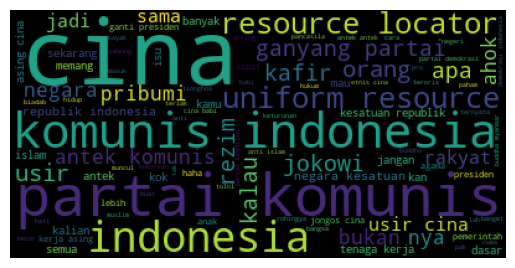

In [27]:
#WordClouc visualisasi berdasarkan race
hs_race = df.loc[df['HS_Race'] == 1]
text = ' '.join(hs_race['Cleansing_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

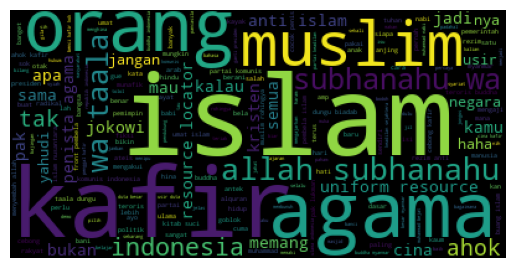

In [28]:
#WordClouc visualisasi berdasarkan religion
hs_religion = df.loc[df['HS_Religion'] == 1]
text = ' '.join(hs_religion['Cleansing_Tweet'])

wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

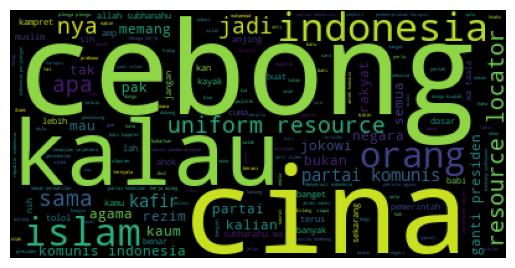

In [29]:
#WordClouc visualisasi berdasarkan race
hs_moderate = df.loc[df['HS_Moderate'] == 1]
teks = ' '.join(hs_moderate['Cleansing_Tweet'])

wordcloud = WordCloud().generate(teks)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

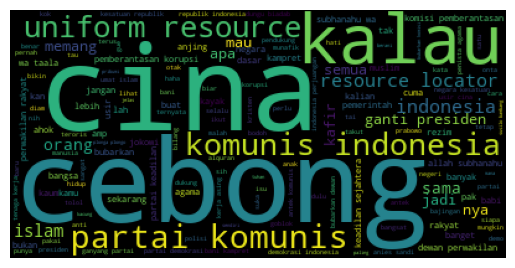

In [30]:
#WordCloud visualisasi berdasarkan kelompok tertentu
hs_group = df.loc[df['HS_Group'] == 1]
teks = ' '.join(hs_group['Cleansing_Tweet'])

wordcloud = WordCloud().generate(teks)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

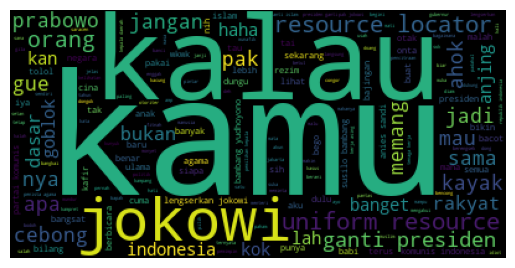

In [31]:
#WordCloud visualisasi berdasarkan kelompok tertentu
hs_individual = df.loc[df['HS_Individual'] == 1]
teks = ' '.join(hs_individual['Cleansing_Tweet'])

wordcloud = WordCloud().generate(teks)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

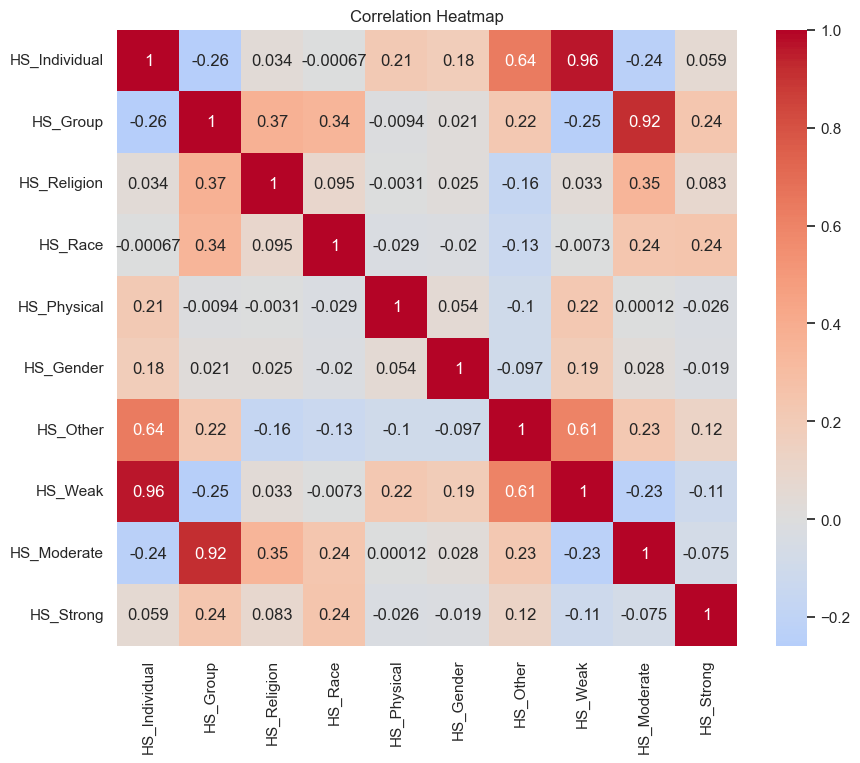

In [32]:
heatmaps_columns = [ 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
                      'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate', 'HS_Strong']

# Membuat matriks korelasi
correlation_matrix = df[heatmaps_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()